<a href="https://colab.research.google.com/github/icampuzanov/SIS420-2_2023/blob/main/Robot_Navigation_in_Warehouse_QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#SEGUNDO PARCIAL

#IGNACIO CAMPUZANO VILLARROEL
#ING. DE SISTEMAS

#CODIGO SUBIDO A GITHUB | https://github.com/icampuzanov/SIS420-2_2023


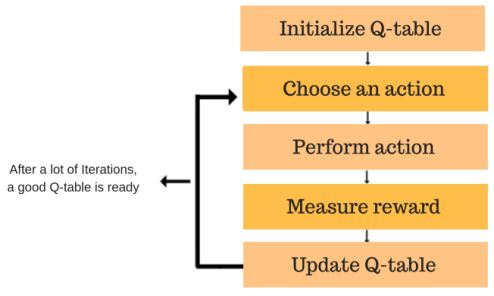

In [ ]:
# import librairies
import numpy as np

# Setting the parameters gamma and alpha for the Q-Learning algorithm
gamma = 0.75
alpha = 0.9

# DEFINING THE ENVIRONMENT
# Simple warehouse with locations:
######################
# A    B     C  #  D #
#####                #
# E #  F  #  G     H #
#   #     #####      #
# I    J     K     L #
######################

# Defining the states
location_to_state = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5,
                     'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11}

# Defining the actions (moving to any location)
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

# Defining the rewards (rows = each state, columns = each action leading to a new state, 1 if possible to go to a new state, 0 if not)
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],    # from A we can only go to B
              [1,0,1,0,0,1,0,0,0,0,0,0],    # from B we can go to A, C, F
              [0,1,0,0,0,0,1,0,0,0,0,0],    # ....
              [0,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,1],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,1,0,0,1,0]])

In [ ]:
# BUILDING THE AI SOLUTION WITH Q-LEARNING

# Maping from the states to the locations
state_to_location = {state: location for location, state in location_to_state.items()}

In [ ]:
# Implement Q-Learning process
def calculate_Q_values(R):
    # Initialize Q-Values to zeros
    Q = np.array(np.zeros((R.shape[0], R.shape[1])))
    # Calculate Q_values
    for i in range(1000):
        current_state = np.random.randint(0, R.shape[1])  # randomly select an action
        playable_actions = []
        for action in range(R.shape[1]):
            if R[current_state, action] > 0:
                playable_actions.append(action)
        next_state = np.random.choice(playable_actions)     # play a random action from possible ones
        # compute Temporal Difference
        TD = R[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,:])] \
         - Q[current_state, next_state]        # played action = next_state in this model
        # Update Q- value
        Q[current_state, next_state] += alpha * TD
    return Q

In [ ]:
# Calculate route from starting_location to end_location
def route (starting_location, ending_location):
    # Assign a big reward to the target location
    R_new = np.copy(R)
    ending_state = location_to_state[ending_location]
    R_new[ending_state,ending_state] = 1000
    Q = calculate_Q_values(R_new)
    #print(Q.astype(int))

    # initialize route
    route=[starting_location]
    next_location = starting_location

    # Calculate optimal route
    while (next_location != ending_location) :
        starting_state = location_to_state[starting_location]  # convert location to state index
        next_state = np.argmax(Q[starting_state,:])
        next_location = state_to_location[next_state]          # convert state index to location
        route.append(next_location)                            # append location to route
        starting_location = next_location
    return route

In [ ]:
print('Route From -> To')
route('E', 'D')

Route From -> To


['E', 'I', 'J', 'K', 'L', 'H', 'D']

In [ ]:
# Function to handle intermediary location before ending_location (approach 1)
def two_leg_route(starting_location, intermediate_location, ending_location):
    return route(starting_location, intermediate_location)[:-1] + route(intermediate_location, ending_location)

In [ ]:
print('Route From -> by -> To')
print(two_leg_route('E', 'B', 'D'))

Route From -> by -> To
['E', 'I', 'J', 'F', 'B', 'C', 'G', 'H', 'D']


In [ ]:
# Calculate route from starting_location to end_location (approach 2)
def best_route (starting_location, ending_location, intermediate_location=None):

    if intermediate_location != None:
        final_location = ending_location
        ending_location = intermediate_location

    # Assign a big reward to the target location
    R_new = np.copy(R)
    ending_state = location_to_state[ending_location]
    R_new[ending_state,ending_state] = 1000
    Q = calculate_Q_values(R_new)
    #print(Q.astype(int))

    # initialize route
    route_path = [starting_location]
    next_location = starting_location

    # Calculate optimal route
    while (next_location != ending_location) :
        starting_state = location_to_state[starting_location]  # convert location to state index
        next_state = np.argmax(Q[starting_state,:])
        next_location = state_to_location[next_state]          # convert state index to location
        route_path.append(next_location)                            # append location to route
        starting_location = next_location

    if intermediate_location != None:
        route_path = route_path[:-1] + route(intermediate_location, final_location)

    return route_path

In [ ]:
print('Route From -> by -> To')
print(best_route('E', 'D', 'B'))

Route From -> by -> To
['E', 'I', 'J', 'F', 'B', 'C', 'G', 'H', 'D']
